### Задача: 
    создать модель, которая бы предсказывала оценку нового продукта конечными пользователями.

В датасете представлены следующие данные:

- Bar id — ID батончика в базе данных
- Company (Maker-if known) — название компании, изготовившей батончик.
- Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
- Broad Bean Origin — название региона, где были выращены какао-бобы.
- Company Location — страна, в которой произведён шоколадный батончик.
- Bean Type — вид какао-бобов, используемых в батончике.
- REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
- Review Date — год публикации рецензии.
- Cocoa Percent — процент какао в шоколаде.
- Rating — оценка батончика фокус-группой.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

In [2]:
display(cacao.head(10))

cacao.info() 

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                               1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                  1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                               1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.3+ KB


Для удобства использования pandas переименуем все столбцы:

In [3]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref',
                 'review_date', 'cocoa_percent', 'company_location',
                 'rating', 'bean_type', 'broad_origin']

In [4]:
cacao.head()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### Bar id

1795


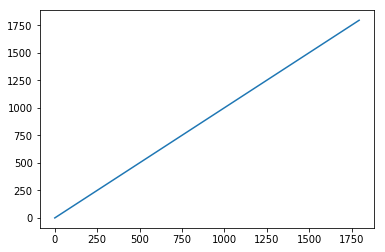

In [5]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

Это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [6]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [68]:
# plt.figure(figsize=(15, 10))
# table = sns.barplot(cacao.company_location.value_counts(), cacao.company_location.unique(), data=cacao)

# plt.show()

### Company

Посмотрим, сколько компаний содержит наш датасет.

In [7]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
Valrhona,21
A. Morin,21
Arete,20
Guittard,18


Попробуем отфильтровать лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов.

In [89]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [90]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
Valrhona,21
A. Morin,21
Arete,20
Guittard,18
Hotel Chocolat (Coppeneur),18


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 407 уникальных значений и 90 строк, в которых производитель неизвестен. А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

### specific_origin

Сделаем то же самое для столбца с местом происхождения какао-бобов.

In [91]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [92]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
Chuao,18
Sambirano,18
Ocumare,16
Ghana,15
Papua New Guinea,15


Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
specific_origin    1737 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


Итого у нас 1012 уникальных значений и 58 строк, в которых название города неизвестно. А вот городов, у которых в рейтинге больше 10 батончиков, всего 15. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

### ref

Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

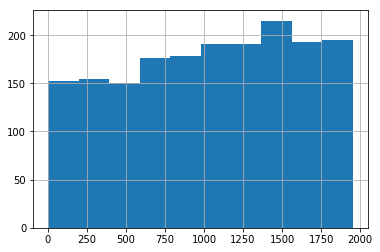

In [8]:
cacao.ref.hist()
cacao.ref.describe()

Как видно, у этого признака нормальное распределение, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

### review_date

Этот столбец также числовой и у него также нет пропусков.

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

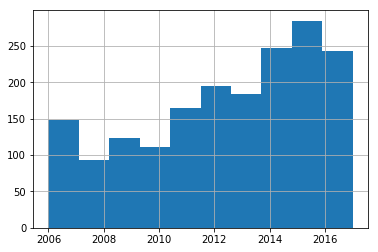

In [9]:
cacao.review_date.hist()
cacao.review_date.describe()

Здесь также заметен тренд на увеличение ревью со временем.

### cocoa_percent

Посмотрим на данные в столбце:

In [11]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
5        70%
6        70%
7        70%
8        70%
9        70%
10       70%
11       70%
12       70%
13       70%
14       70%
15       70%
16       70%
17       70%
18       70%
19       70%
20       63%
21       70%
22       63%
23       70%
24       70%
        ... 
1770     85%
1771     70%
1772     78%
1773     78%
1774     65%
1775     68%
1776     66%
1777     72%
1778     80%
1779     72%
1780     65%
1781     70%
1782     70%
1783     62%
1784     75%
1785    375%
1786     90%
1787     70%
1788     68%
1789     58%
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

Значения в столбцах представлены в виде процентов. Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец:

In [12]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

Посмотрим распределение признака:

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

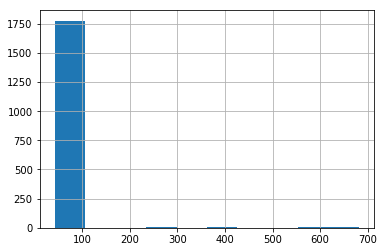

In [13]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()